In [1]:
import wandb
import pandas as pd
from datetime import datetime

# Initialize W&B API
wandb_api = wandb.Api(api_key="a57a0466fc25b416b4e026ec6970ba6eff09e105")

# Define your project path and parameters
project_path = 'bayesopt'
function = "Gramacy1d" # The specific value for parameter Z
task = "AL"  # The specific value for parameter W

# Define your date range
#start_date = datetime(2024, 3, 6)  # Start date (year, month, day)
#end_date = datetime(2024, 3, 7, 14)    # End date (year, month, day)
start_date = datetime(2024, 3, 7, 20)  # Start date (year, month, day)
end_date = datetime(2024, 3, 10, 1)    # End date (year, month, day)#
# Format dates to string if necessary
start_date_str = start_date.strftime('%Y-%m-%dT%H:%M:%S')
end_date_str = end_date.strftime('%Y-%m-%dT%H:%M:%S')

# Query runs with the specified filters
runs = wandb_api.runs(
    path=project_path,
    filters={
        "config.function": function,
        "config.task": task # The specific value for parameter W
,
        "$and": [
            {"created_at": {"$gte": start_date_str}},
            {"created_at": {"$lte": end_date_str}}
        ]
    }
)

# Retrieve loss for each step and store in DataFrames
df_list = []

for run in runs:
    # Retrieve history for the specific run, adjust 'loss' as necessary
    history = run.history(keys=['-MLL','rmse','iteration_time'])
    df = pd.DataFrame(history)
    df['run_id'] = run.id  # or run.name for a readable identifier
    df['acquisition'] = run.config['acquisition'] if 'acquisition' in run.config else None
    df['type'] = run.config['type'] if 'type' in run.config else None
    df['n_iter'] = run.config['n_iter'] if 'n_iter' in run.config else None
    df_list.append(df)

# Optionally, combine all DataFrames into a single one for further analysis
combined_df = pd.concat(df_list, ignore_index=True)

# Now df_list contains DataFrames for runs that match all specified criteria


In [2]:
#original_df = combined_df.copy()

In [319]:
combined_df = original_df.copy()

In [320]:
combined_df.groupby(['acquisition','type'])['run_id'].apply(lambda x: len(np.unique(x)))

acquisition       type         
BALDKLMM          bayesian         60
                  part_bayesian    40
BALM              bayesian         60
                  part_bayesian    40
BQBC              bayesian         60
                  part_bayesian    40
QBMGP             bayesian         60
                  part_bayesian    40
Random            bayesian         60
                  part_bayesian    40
SALHL             bayesian         60
                  part_bayesian    40
SALHellingerMM    bayesian         60
                  part_bayesian    40
SALKL             bayesian         60
                  part_bayesian    40
SALWS             bayesian         60
                  part_bayesian    40
SALWassersteinMM  bayesian         60
                  part_bayesian    40
Name: run_id, dtype: int64

In [321]:
combined_df

,_step,-MLL,rmse,iteration_time,run_id,acquisition,type,n_iter
0,0,1.326463,0.980667,20.698144,lqrp2okg,SALKL,bayesian,90
1,1,293.227691,0.506436,28.832667,lqrp2okg,SALKL,bayesian,90
2,2,218.952971,0.280983,15.309949,lqrp2okg,SALKL,bayesian,90
3,3,104.017464,0.281568,14.657649,lqrp2okg,SALKL,bayesian,90
4,4,104.905590,0.312739,13.854006,lqrp2okg,SALKL,bayesian,90
...,...,...,...,...,...,...,...,...
89995,85,0.433335,0.112573,7.579801,o0mu6juq,SALHL,bayesian,90
89996,86,0.427166,0.112746,7.668835,o0mu6juq,SALHL,bayesian,90
89997,87,0.423029,0.112512,7.833261,o0mu6juq,SALHL,bayesian,90
89998,88,0.426074,0.112727,8.057143,o0mu6juq,SALHL,bayesian,90


In [322]:
combined_df

,_step,-MLL,rmse,iteration_time,run_id,acquisition,type,n_iter
0,0,1.326463,0.980667,20.698144,lqrp2okg,SALKL,bayesian,90
1,1,293.227691,0.506436,28.832667,lqrp2okg,SALKL,bayesian,90
2,2,218.952971,0.280983,15.309949,lqrp2okg,SALKL,bayesian,90
3,3,104.017464,0.281568,14.657649,lqrp2okg,SALKL,bayesian,90
4,4,104.905590,0.312739,13.854006,lqrp2okg,SALKL,bayesian,90
...,...,...,...,...,...,...,...,...
89995,85,0.433335,0.112573,7.579801,o0mu6juq,SALHL,bayesian,90
89996,86,0.427166,0.112746,7.668835,o0mu6juq,SALHL,bayesian,90
89997,87,0.423029,0.112512,7.833261,o0mu6juq,SALHL,bayesian,90
89998,88,0.426074,0.112727,8.057143,o0mu6juq,SALHL,bayesian,90


In [323]:
type_= 'part_bayesian'

In [324]:
n_runs_show = 30
n_iter = combined_df.n_iter.max()
n_acquisition = len(combined_df.groupby('acquisition').count())

In [325]:
n_acquisition

10

In [326]:
df_bayesian = combined_df[combined_df['type']=='bayesian']
df_part_bayesian = combined_df[combined_df['type']=='part_bayesian']

In [327]:
df_bayesian = df_bayesian.merge(df_bayesian.groupby('run_id').count()._step.rename("n_done_iter", inplace=True), how='inner', left_on='run_id', right_index=True)
df_bayesian = df_bayesian[df_bayesian.n_done_iter==n_iter].reset_index(drop=True)
df_part_bayesian = df_part_bayesian.merge(df_part_bayesian.groupby('run_id').count()._step.rename("n_done_iter", inplace=True), how='inner', left_on='run_id', right_index=True)
df_part_bayesian = df_part_bayesian[df_part_bayesian.n_done_iter==n_iter].reset_index(drop=True)

In [328]:
df_bayesian

,_step,-MLL,rmse,iteration_time,run_id,acquisition,type,n_iter,n_done_iter
0,0,1.326463,0.980667,20.698144,lqrp2okg,SALKL,bayesian,90,90
1,1,293.227691,0.506436,28.832667,lqrp2okg,SALKL,bayesian,90,90
2,2,218.952971,0.280983,15.309949,lqrp2okg,SALKL,bayesian,90,90
3,3,104.017464,0.281568,14.657649,lqrp2okg,SALKL,bayesian,90,90
4,4,104.905590,0.312739,13.854006,lqrp2okg,SALKL,bayesian,90,90
...,...,...,...,...,...,...,...,...,...
53995,85,0.433335,0.112573,7.579801,o0mu6juq,SALHL,bayesian,90,90
53996,86,0.427166,0.112746,7.668835,o0mu6juq,SALHL,bayesian,90,90
53997,87,0.423029,0.112512,7.833261,o0mu6juq,SALHL,bayesian,90,90
53998,88,0.426074,0.112727,8.057143,o0mu6juq,SALHL,bayesian,90,90


In [329]:
list_tuples_bayesian = df_bayesian.groupby(['acquisition', 'run_id']).count().index.values

In [330]:
xxx = df_bayesian.groupby(['acquisition', 'run_id']).count().reset_index()
list_series = []
for acquisition in list(set(df_bayesian.acquisition.values)):
    series = xxx[xxx.acquisition==acquisition].reset_index()[['run_id']].reset_index()
    series['index'] = series['index'] +1
    list_series.append(series)
dict_ids = {}
df = pd.concat(list_series)[['run_id', 'index']]
dict_ids = df.set_index('run_id').to_dict('index')
df_bayesian['run_number'] = df_bayesian['run_id'].apply(lambda x: dict_ids[x]['index'])

In [331]:
xxx = df_part_bayesian.groupby(['acquisition', 'run_id']).count().reset_index()
list_series = []
for acquisition in list(set(df_part_bayesian.acquisition.values)):
    series = xxx[xxx.acquisition==acquisition].reset_index()[['run_id']].reset_index()
    series['index'] = series['index'] +1
    list_series.append(series)
dict_ids = {}
df = pd.concat(list_series)[['run_id', 'index']]
dict_ids = df.set_index('run_id').to_dict('index')
df_part_bayesian['run_number'] = df_part_bayesian['run_id'].apply(lambda x: dict_ids[x]['index'])

In [332]:
# combined_df = combined_df.merge(combined_df.groupby('run_id').count()._step.rename("n_done_iter", inplace=True), how='inner', left_on='run_id', right_index=True)
# combined_df = combined_df[combined_df.n_done_iter==n_iter]

In [333]:
combined_df = pd.concat([df_bayesian,df_part_bayesian]).reset_index(drop=True)

In [334]:
combined_df[combined_df.run_number <=40]

,_step,-MLL,rmse,iteration_time,run_id,acquisition,type,n_iter,n_done_iter,run_number
0,0,1.326463,0.980667,20.698144,lqrp2okg,SALKL,bayesian,90,90,38
1,1,293.227691,0.506436,28.832667,lqrp2okg,SALKL,bayesian,90,90,38
2,2,218.952971,0.280983,15.309949,lqrp2okg,SALKL,bayesian,90,90,38
3,3,104.017464,0.281568,14.657649,lqrp2okg,SALKL,bayesian,90,90,38
4,4,104.905590,0.312739,13.854006,lqrp2okg,SALKL,bayesian,90,90,38
...,...,...,...,...,...,...,...,...,...,...
89995,85,-3.089623,0.071689,1.826802,0pn46rad,SALKL,part_bayesian,90,90,2
89996,86,-3.089968,0.071845,1.943449,0pn46rad,SALKL,part_bayesian,90,90,2
89997,87,-3.090053,0.071833,2.092182,0pn46rad,SALKL,part_bayesian,90,90,2
89998,88,-3.090172,0.071832,2.041869,0pn46rad,SALKL,part_bayesian,90,90,2


In [335]:
combined_df = combined_df[~combined_df.acquisition.isin(['BALDKLMM', 'SALHellingerMM', 'SALWassersteinMM'])]

In [336]:
df_bayesian = combined_df[combined_df['type']=='bayesian'].reset_index(drop=True)
df_part_bayesian = combined_df[combined_df['type']=='part_bayesian'].reset_index(drop=True)

In [337]:
combined_df = pd.concat([df_bayesian, df_part_bayesian])

In [338]:
combined_df = combined_df[combined_df.run_number<=40]

In [339]:
result_time = combined_df.groupby(['_step', 'type']).agg(
    mean_iter_time=('iteration_time', 'mean'),   # Calculate mean for data
    std_iter_time=('iteration_time', 'std'),     # Calculate std for data
).reset_index()


In [343]:
result_time[result_time._step>80]

,_step,type,mean_iter_time,std_iter_time,margin_of_error_corrected,ci_lower_corrected,ci_upper_corrected
162,81,bayesian,11.185287,3.013896,4.957858,6.227429,16.143145
163,81,part_bayesian,2.059579,0.310747,0.511178,1.548401,2.570758
164,82,bayesian,11.656491,4.576171,7.527801,4.128691,19.184292
165,82,part_bayesian,2.210220,0.346837,0.570547,1.639674,2.780767
166,83,bayesian,11.668553,4.364589,7.179750,4.488804,18.848303
167,83,part_bayesian,2.211016,0.343889,0.565698,1.645318,2.776714
168,84,bayesian,12.392788,8.135021,13.382110,-0.989322,25.774899
169,84,part_bayesian,2.304203,0.379395,0.624104,1.680098,2.928307
170,85,bayesian,11.735322,5.271375,8.671412,3.063910,20.406734
171,85,part_bayesian,2.189554,0.325470,0.535397,1.654157,2.724952


In [340]:
result_time.to_csv('../iter_times.csv')

C:\Users\felip\AppData\Local\Temp\ipykernel_22100\4155727473.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='_step', y='mean_iter_time', data=result_time, palette=colors, style='type', markers=False, dashes=False, legend=False)# style='type', legend='full', hue='type')
c:\Users\felip\anaconda3\envs\bo-cuda\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\felip\anaconda3\envs\bo-cuda\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 1400x800 with 0 Axes>

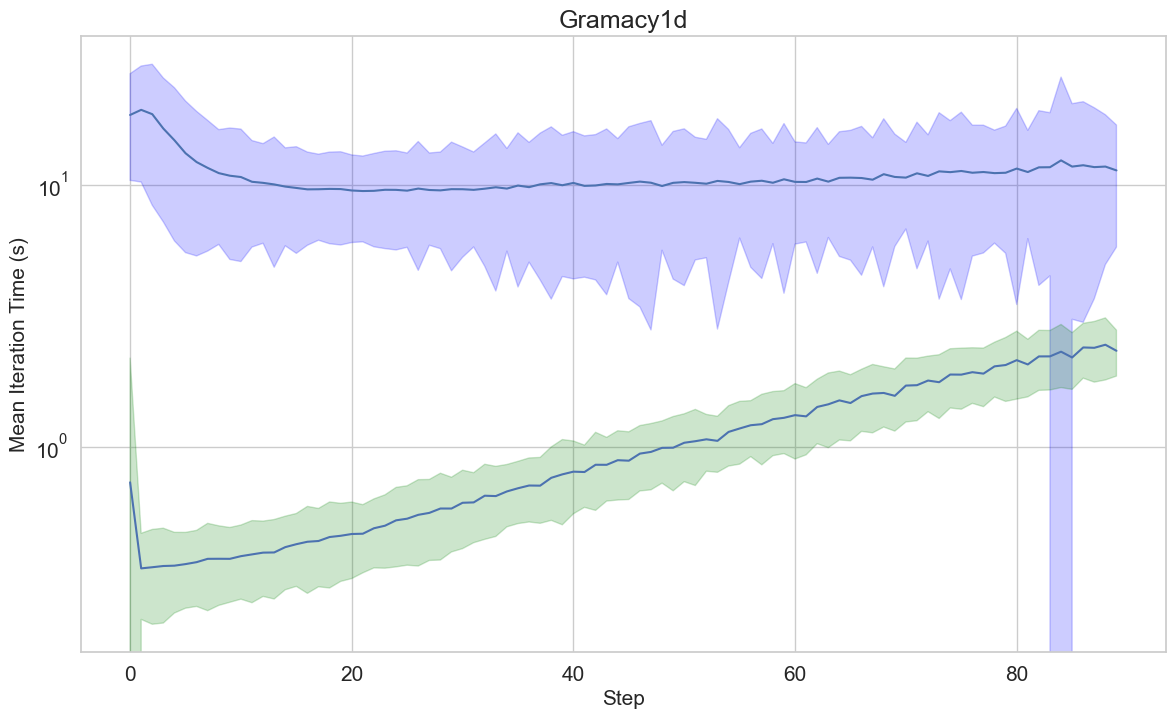

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
z_score = 1.645
result_time['margin_of_error_corrected'] = z_score * result_time['std_iter_time']  # Assuming standard deviation represents the full sample variability directly

# Correcting the CI lower and upper bounds based on the corrected margin of error
result_time['ci_lower_corrected'] = result_time['mean_iter_time'] - result_time['margin_of_error_corrected']
result_time['ci_upper_corrected'] = result_time['mean_iter_time'] + result_time['margin_of_error_corrected']


plt.figure(figsize=(14, 8))
colors = {"bayesian": "blue", "part_bayesian": "green"}
sns.set(style="whitegrid")  # Reapplying seaborn style for aesthetics

# Plotting mean iteration times using seaborn for the base line plot
sns.lineplot(x='_step', y='mean_iter_time', data=result_time, palette=colors, style='type', markers=False, dashes=False, legend=False)# style='type', legend='full', hue='type')

# Extracting data for filling between CI with corrected alignment and formatting
for method, color in colors.items():
    subset = result_time[result_time['type'] == method]
    steps = subset['_step'].values
    ci_lower = subset['ci_lower_corrected'].values
    ci_upper = subset['ci_upper_corrected'].values

    # Using fill_between with numpy arrays for the CI shading
    plt.fill_between(steps, ci_lower, ci_upper, color=color, alpha=0.2)

# Setting font size for the labels and title
plt.xlabel('Step', fontsize=15)
plt.ylabel('Mean Iteration Time (s)', fontsize=15)
plt.yscale('log')
plt.title(function, fontsize=18)

# Adjusting tick labels font size
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('../plots/itertime_'+function+'.png')
plt.show()

In [38]:
combined_df

,_step,-MLL,rmse,iteration_time,run_id,acquisition,type,n_iter,n_done_iter,n_index,run_number
0,0,1.326463,0.980667,20.698144,lqrp2okg,SALKL,bayesian,90,90,0,1.0
1,1,293.227691,0.506436,28.832667,lqrp2okg,SALKL,bayesian,90,90,1,1.0
2,2,218.952971,0.280983,15.309949,lqrp2okg,SALKL,bayesian,90,90,2,1.0
3,3,104.017464,0.281568,14.657649,lqrp2okg,SALKL,bayesian,90,90,3,1.0
4,4,104.905590,0.312739,13.854006,lqrp2okg,SALKL,bayesian,90,90,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12595,85,-2.992097,0.052697,2.230270,2oe2ivdm,SALHL,part_bayesian,90,90,12595,14.0
12596,86,-2.992127,0.052700,2.376317,2oe2ivdm,SALHL,part_bayesian,90,90,12596,14.0
12597,87,-2.992158,0.052703,2.359034,2oe2ivdm,SALHL,part_bayesian,90,90,12597,14.0
12598,88,-2.994408,0.052989,2.230664,2oe2ivdm,SALHL,part_bayesian,90,90,12598,14.0


In [344]:
df_compore_types = combined_df[['-MLL','_step','acquisition','run_number', 'type']]

In [345]:
df_compare_bayesian = df_compore_types[df_compore_types['type']=='bayesian']
df_compare_part_bayesian =df_compore_types[df_compore_types['type']=='part_bayesian']
df_compare_merged = df_compare_bayesian.merge(df_compare_part_bayesian, on=['acquisition','_step', 'run_number'], suffixes=['_bayesian', '_part_beyesian'])

In [346]:
df_compare_merged

,-MLL_bayesian,_step,acquisition,run_number,type_bayesian,-MLL_part_beyesian,type_part_beyesian
0,1.326463,0,SALKL,38,bayesian,164.900832,part_bayesian
1,293.227691,1,SALKL,38,bayesian,0.733880,part_bayesian
2,218.952971,2,SALKL,38,bayesian,0.821790,part_bayesian
3,104.017464,3,SALKL,38,bayesian,0.388251,part_bayesian
4,104.905590,4,SALKL,38,bayesian,0.244226,part_bayesian
...,...,...,...,...,...,...,...
25195,0.433335,85,SALHL,38,bayesian,-3.008344,part_bayesian
25196,0.427166,86,SALHL,38,bayesian,-3.008373,part_bayesian
25197,0.423029,87,SALHL,38,bayesian,-3.006996,part_bayesian
25198,0.426074,88,SALHL,38,bayesian,-3.007025,part_bayesian


In [347]:
df_compare_merged['min_type_step'] = np.where(df_compare_merged['-MLL_bayesian'] < df_compare_merged['-MLL_part_beyesian'], 'bayesian_win', 'part_bayesian_win')

In [348]:
def count_specific_category(category_name):
    return lambda x: (x == category_name).sum()


In [349]:
df_compare_merged

,-MLL_bayesian,_step,acquisition,run_number,type_bayesian,-MLL_part_beyesian,type_part_beyesian,min_type_step
0,1.326463,0,SALKL,38,bayesian,164.900832,part_bayesian,bayesian_win
1,293.227691,1,SALKL,38,bayesian,0.733880,part_bayesian,part_bayesian_win
2,218.952971,2,SALKL,38,bayesian,0.821790,part_bayesian,part_bayesian_win
3,104.017464,3,SALKL,38,bayesian,0.388251,part_bayesian,part_bayesian_win
4,104.905590,4,SALKL,38,bayesian,0.244226,part_bayesian,part_bayesian_win
...,...,...,...,...,...,...,...,...
25195,0.433335,85,SALHL,38,bayesian,-3.008344,part_bayesian,part_bayesian_win
25196,0.427166,86,SALHL,38,bayesian,-3.008373,part_bayesian,part_bayesian_win
25197,0.423029,87,SALHL,38,bayesian,-3.006996,part_bayesian,part_bayesian_win
25198,0.426074,88,SALHL,38,bayesian,-3.007025,part_bayesian,part_bayesian_win


In [350]:
max_runs = df_compare_merged.run_number.max()

In [351]:
df_compare_agg = df_compare_merged.groupby(['_step', 'acquisition']).agg({'min_type_step': count_specific_category('bayesian_win')})



In [352]:
df_compare_agg = df_compare_agg/max_runs

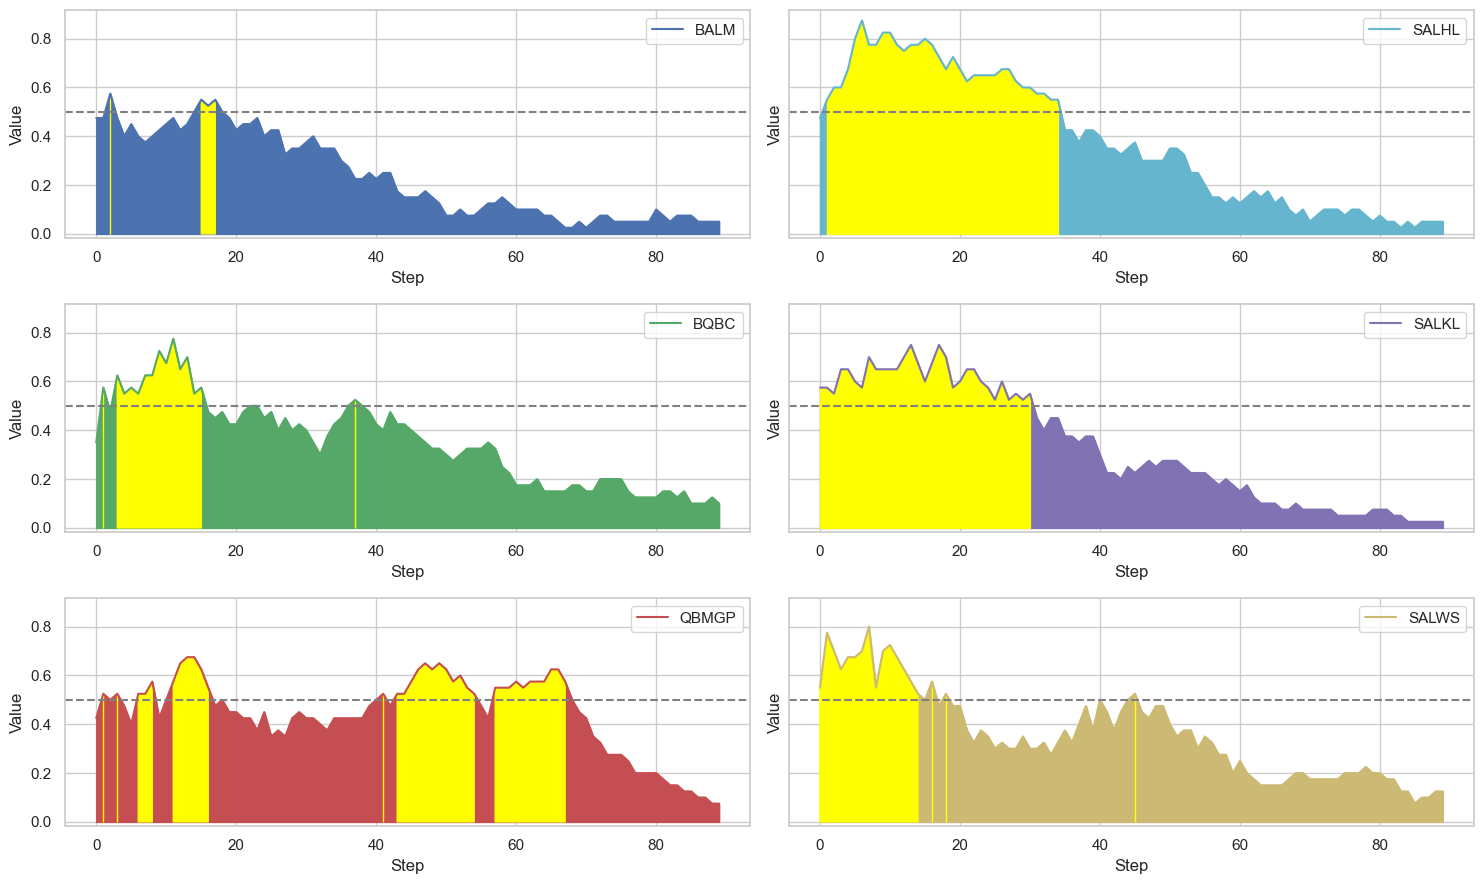

In [353]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the CSV fil # Adjust the path to your CSV file
data = df_compare_agg.reset_index()

# Exclude specified acquisition types
excluded_types = ['SALWassersteinMM', 'BALDKLMM', 'SALHellingerMM', 'Random']
filtered_data = data[~data['acquisition'].isin(excluded_types)]

# Define acquisition types for left and right columns
left_column_types = ['BALM', 'BQBC', 'QBMGP']
right_column_types = [acq for acq in filtered_data['acquisition'].unique() if acq not in left_column_types]

# Determine the number of rows for the subplots
total_plots = max(len(left_column_types), len(right_column_types))
compact_height = 3 * total_plots  # Adjust the height of each subplot for a more compact layout

# Create a 2-column subplot layout
fig, axs = plt.subplots(total_plots, 2, figsize=(15, compact_height), sharey=True)

# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Determine global min and max for 'min_type_step'
global_min = filtered_data['min_type_step'].min()
global_max = filtered_data['min_type_step'].max()

# Expand the global min/max slightly to ensure visibility of all plot lines
y_limit = (global_min - 0.05 * (global_max - global_min), global_max + 0.05 * (global_max - global_min))

for i in range(total_plots):
    axs[i, 0].set_ylim(y_limit)
    axs[i, 1].set_ylim(y_limit)

# Define a color cycle for the plots
color_cycle = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot left column types
for i, acquisition in enumerate(left_column_types):
    subset = filtered_data[filtered_data['acquisition'] == acquisition]
    color = color_cycle[i % len(color_cycle)]
    axs[i, 0].plot(subset['_step'], subset['min_type_step'], label=acquisition, linestyle='-', color=color)
    axs[i, 0].fill_between(subset['_step'], subset['min_type_step'],color=color )
    axs[i, 0].fill_between(subset['_step'], subset['min_type_step'],color='yellow',  where= subset['min_type_step']>0.5)
    axs[i, 0].axhline(y=0.5, color='gray', linestyle='--')
    axs[i, 0].set_xlabel('Step')
    axs[i, 0].set_ylabel('Value')
    axs[i, 0].legend()

# Plot right column types
for i, acquisition in enumerate(right_column_types):
    subset = filtered_data[filtered_data['acquisition'] == acquisition]
    color = color_cycle[(i + len(left_column_types)) % len(color_cycle)]
    axs[i, 1].plot(subset['_step'], subset['min_type_step'], label=acquisition, linestyle='-', color=color)
    axs[i, 1].fill_between(subset['_step'], subset['min_type_step'],color=color )
    axs[i, 1].fill_between(subset['_step'], subset['min_type_step'],color='yellow', where= subset['min_type_step']>0.5)
    axs[i, 1].axhline(y=0.5, color='gray', linestyle='--')
    axs[i, 1].set_xlabel('Step')
    axs[i, 1].set_ylabel('Value')
    axs[i, 1].legend()

# Hide unused subplots
for i in range(len(left_column_types), total_plots):
    axs[i, 0].axis('off')
for i in range(len(right_column_types), total_plots):
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


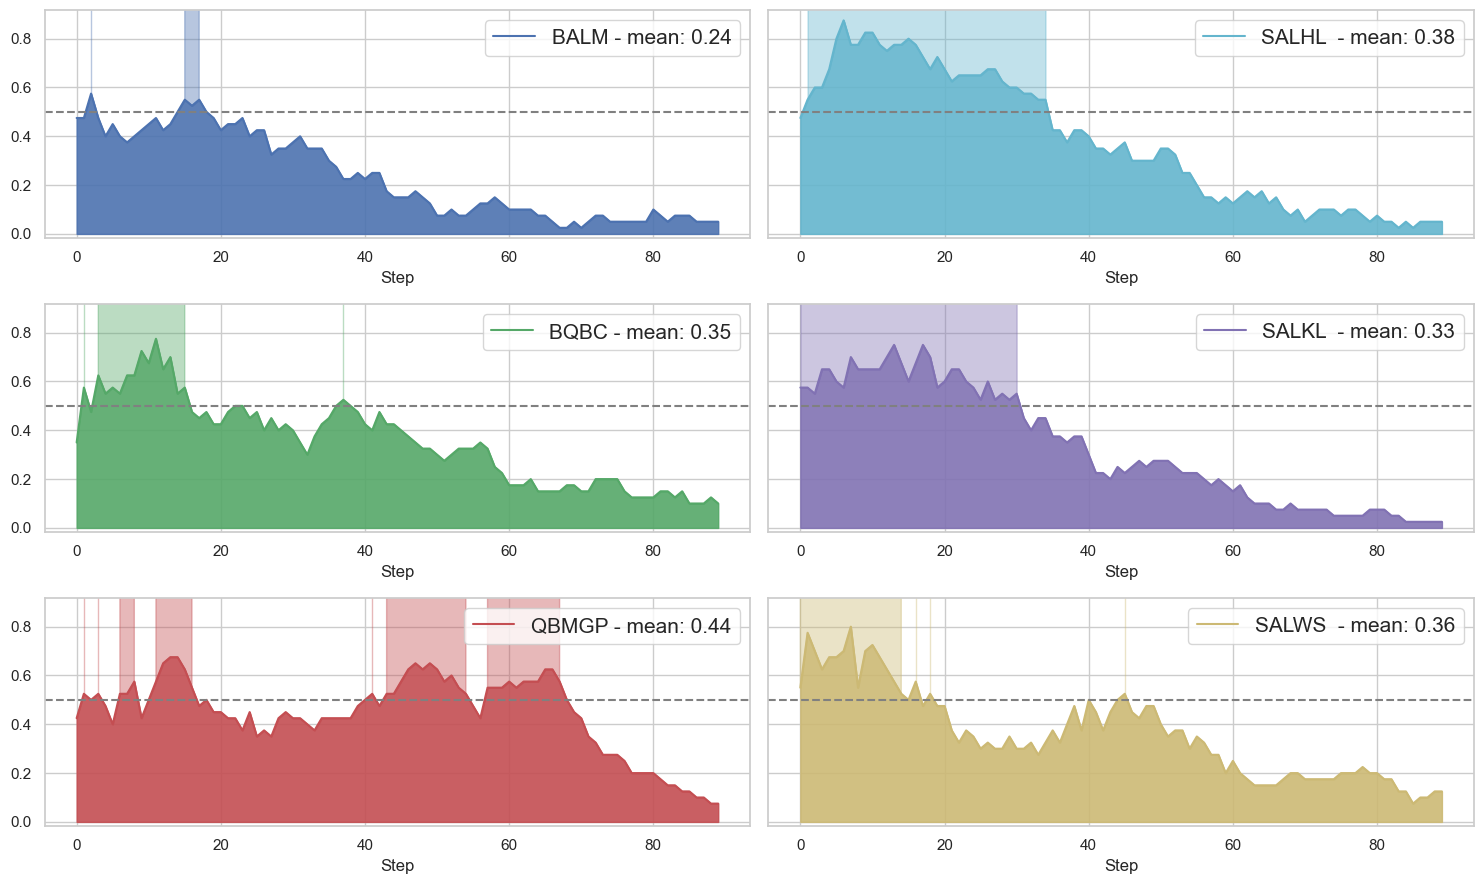

In [356]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the CSV fil # Adjust the path to your CSV file
data = df_compare_agg.reset_index()

# Exclude specified acquisition types
excluded_types = ['SALWassersteinMM', 'BALDKLMM', 'SALHellingerMM', 'Random']
filtered_data = data[~data['acquisition'].isin(excluded_types)]

# Define acquisition types for left and right columns
left_column_types = ['BALM', 'BQBC', 'QBMGP']
right_column_types = [acq for acq in filtered_data['acquisition'].unique() if acq not in left_column_types]

# Determine the number of rows for the subplots
total_plots = max(len(left_column_types), len(right_column_types))
compact_height = 3 * total_plots  # Adjust the height of each subplot for a more compact layout

# Create a 2-column subplot layout
fig, axs = plt.subplots(total_plots, 2, figsize=(15, compact_height), sharey=True)

# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Determine global min and max for 'min_type_step'
global_min = filtered_data['min_type_step'].min()
global_max = filtered_data['min_type_step'].max()

# Expand the global min/max slightly to ensure visibility of all plot lines
y_limit = (global_min - 0.05 * (global_max - global_min), global_max + 0.05 * (global_max - global_min))

for i in range(total_plots):
    axs[i, 0].set_ylim(y_limit)
    axs[i, 1].set_ylim(y_limit)

# Define a color cycle for the plots
color_cycle = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot left column types
for i, acquisition in enumerate(left_column_types):
    subset = filtered_data[filtered_data['acquisition'] == acquisition]
    color = color_cycle[i % len(color_cycle)]
    mean_value = subset['min_type_step'].mean()
    axs[i, 0].plot(subset['_step'], subset['min_type_step'], label=f"{acquisition} - mean: {mean_value:.2f}", linestyle='-', color=color)
    axs[i, 0].fill_between(subset['_step'],1, subset['min_type_step'],color=color, alpha=.4, where= subset['min_type_step']>0.5)
    axs[i, 0].fill_between(subset['_step'], subset['min_type_step'],color=color, alpha=.9 )
    axs[i, 0].axhline(y=0.5, color='gray', linestyle='--')
    axs[i, 0].set_xlabel('Step')
    axs[i, 0].set_ylabel('')
    axs[i, 0].legend(fontsize=15)

# Plot right column types
for i, acquisition in enumerate(right_column_types):
    subset = filtered_data[filtered_data['acquisition'] == acquisition]
    color = color_cycle[(i + len(left_column_types)) % len(color_cycle)]
    mean_value = subset['min_type_step'].mean()
    axs[i, 1].plot(subset['_step'], subset['min_type_step'], label=f"{acquisition}  - mean: {mean_value:.2f}", linestyle='-', color=color)
    axs[i, 1].fill_between(subset['_step'],1, subset['min_type_step'],color=color, alpha=.4, where= subset['min_type_step']>0.5)
    axs[i, 1].fill_between(subset['_step'], subset['min_type_step'],color=color, alpha=.9 )
    axs[i, 1].axhline(y=0.5, color='gray', linestyle='--')
    axs[i, 1].set_xlabel('Step')
    axs[i, 1].set_ylabel('')
    axs[i, 1].legend(fontsize=15)

# Hide unused subplots
for i in range(len(left_column_types), total_plots):
    axs[i, 0].axis('off')
for i in range(len(right_column_types), total_plots):
    axs[i, 1].axis('off')

plt.tight_layout()
plt.savefig('../plots/bayesian_wins_'+function+'.png')
plt.show()


In [357]:
df_compare_agg.to_csv('../compare_runs.csv')

In [364]:
type_ = 'bayesian'

In [377]:
type_df = combined_df[combined_df['type']==type_]

In [378]:
type_df['rank'] = type_df.groupby(['_step', 'run_number'])['-MLL'].rank(method='min')

C:\Users\felip\AppData\Local\Temp\ipykernel_22100\2919400536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df['rank'] = type_df.groupby(['_step', 'run_number'])['-MLL'].rank(method='min')


In [379]:
type_df

,_step,-MLL,rmse,iteration_time,run_id,acquisition,type,n_iter,n_done_iter,run_number,rank
0,0,1.326463,0.980667,20.698144,lqrp2okg,SALKL,bayesian,90,90,38,3.0
1,1,293.227691,0.506436,28.832667,lqrp2okg,SALKL,bayesian,90,90,38,7.0
2,2,218.952971,0.280983,15.309949,lqrp2okg,SALKL,bayesian,90,90,38,6.0
3,3,104.017464,0.281568,14.657649,lqrp2okg,SALKL,bayesian,90,90,38,5.0
4,4,104.905590,0.312739,13.854006,lqrp2okg,SALKL,bayesian,90,90,38,4.0
...,...,...,...,...,...,...,...,...,...,...,...
37795,85,0.433335,0.112573,7.579801,o0mu6juq,SALHL,bayesian,90,90,38,7.0
37796,86,0.427166,0.112746,7.668835,o0mu6juq,SALHL,bayesian,90,90,38,7.0
37797,87,0.423029,0.112512,7.833261,o0mu6juq,SALHL,bayesian,90,90,38,7.0
37798,88,0.426074,0.112727,8.057143,o0mu6juq,SALHL,bayesian,90,90,38,7.0


In [ ]:
result = combined_df.groupby(by=['_step','acquisition'])['-MLL'].agg(
    mean='mean',  # Calculate mean
    std='std'     # Calculate std
)

In [381]:
result = type_df.groupby(['_step', 'acquisition']).agg(
    mean_NMLL=('-MLL', 'mean'),   # Calculate mean for data
    std_NMLL=('-MLL', 'std'),     # Calculate std for data
    mean_rank=('rank', 'mean'), # Calculate mean for data2
    std_rank=('rank', 'std')    # Calculate std for data2
).reset_index()


In [382]:
result

,_step,acquisition,mean_NMLL,std_NMLL,mean_rank,std_rank
0,0,BALM,8.822684,28.864298,4.025,2.130216
1,0,BQBC,10.344169,35.714442,4.225,1.967525
2,0,QBMGP,5.216264,17.031656,4.025,1.967525
3,0,Random,6.986026,33.762715,3.925,2.080280
4,0,SALHL,3.052983,5.705595,4.100,2.121925
...,...,...,...,...,...,...
625,89,QBMGP,0.253896,0.073231,4.275,1.880909
626,89,Random,0.170230,0.033190,1.800,1.202561
627,89,SALHL,0.285981,0.635290,4.900,2.239505
628,89,SALKL,0.066358,0.856478,4.800,1.976788


In [383]:
result.to_csv('../results'+function+'_'+type_+'.csv')

In [384]:
result.reset_index(inplace=True)

In [385]:
result

,index,_step,acquisition,mean_NMLL,std_NMLL,mean_rank,std_rank
0,0,0,BALM,8.822684,28.864298,4.025,2.130216
1,1,0,BQBC,10.344169,35.714442,4.225,1.967525
2,2,0,QBMGP,5.216264,17.031656,4.025,1.967525
3,3,0,Random,6.986026,33.762715,3.925,2.080280
4,4,0,SALHL,3.052983,5.705595,4.100,2.121925
...,...,...,...,...,...,...,...
625,625,89,QBMGP,0.253896,0.073231,4.275,1.880909
626,626,89,Random,0.170230,0.033190,1.800,1.202561
627,627,89,SALHL,0.285981,0.635290,4.900,2.239505
628,628,89,SALKL,0.066358,0.856478,4.800,1.976788


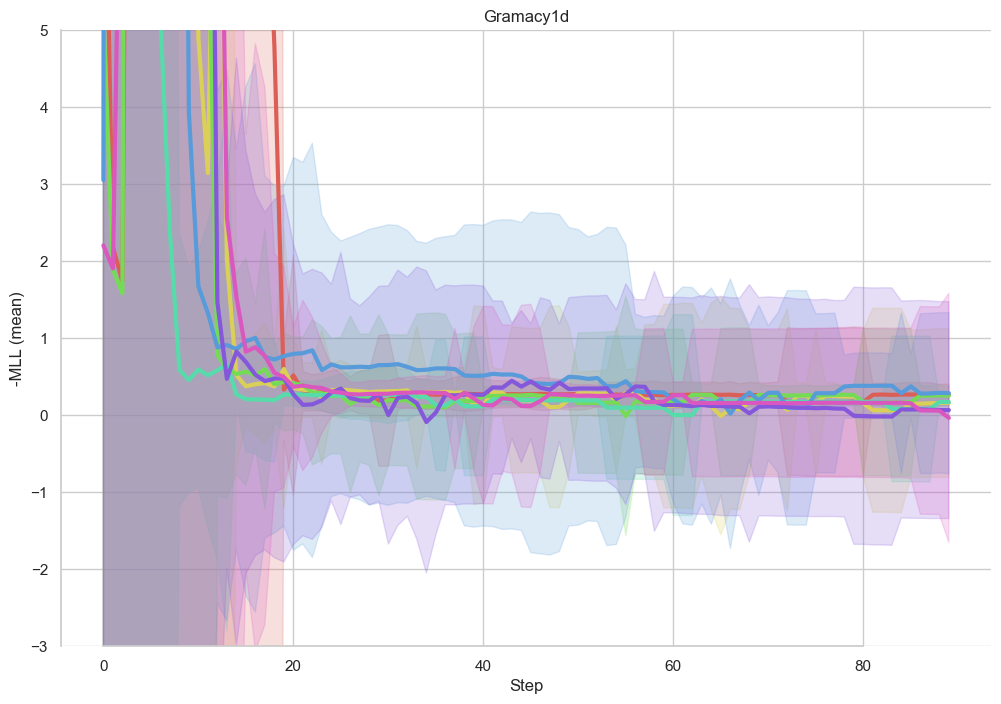

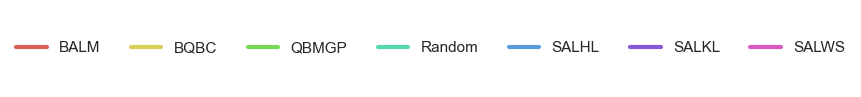

In [386]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
df = result

# Set the style of seaborn
sns.set(style="whitegrid")

# Define a bright color palette
palette = sns.color_palette("hls", n_colors=len(df['acquisition'].unique()))
palette_dict = dict(zip(df['acquisition'].unique(), palette))

# Main plot
plt.figure(figsize=(12, 8))
for i, acquisition in enumerate(df['acquisition'].unique()):
    subset = df[df['acquisition'] == acquisition]
    x = subset['_step'].to_numpy()
    y = subset['mean_NMLL'].to_numpy()
    std_dev = subset['std_NMLL'].to_numpy()
    ci = 1.645 * std_dev  # 90% confidence interval
    plt.plot(x, y, label=acquisition, color=palette[i], lw=3)
    plt.fill_between(x, y - ci, y + ci, color=palette[i], alpha=0.2)

# Set title and labels
plot_title = 'Gramacy1d'
plt.title(plot_title)
plt.xlabel('Step')
plt.ylabel('-MLL (mean)')
plt.ylim(-3, 5)
sns.despine(trim=True)

# Extract handles and labels for the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Show the main plot
plt.show()

# Legend plot
# Create a new figure specifically for the legend
fig_legend, ax_legend = plt.subplots(figsize=(10, 1))
# Add the legend from the handles and labels
ax_legend.legend(handles, labels, loc='center', ncol=len(labels), frameon=False)
ax_legend.axis('off')

# Show the legend plot
plt.show()



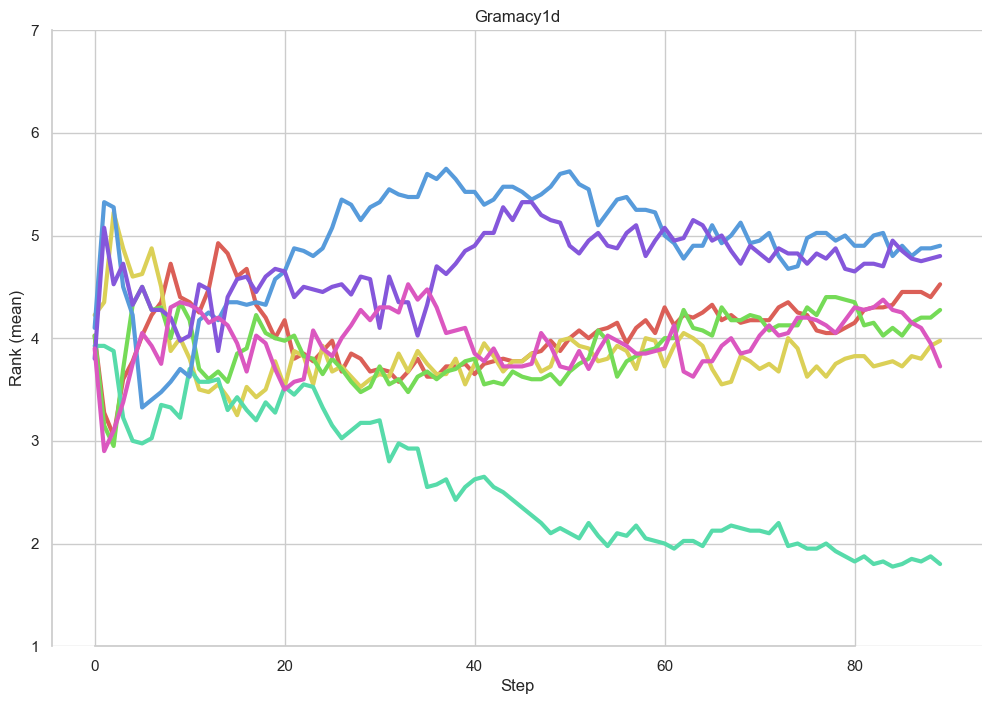

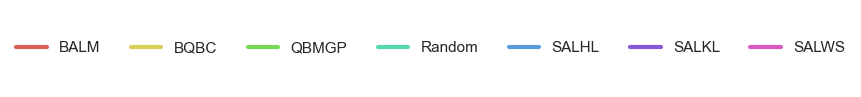

In [388]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
df = result

# Set the style of seaborn
sns.set(style="whitegrid")

# Define a bright color palette
palette = sns.color_palette("hls", n_colors=len(df['acquisition'].unique()))
palette_dict = dict(zip(df['acquisition'].unique(), palette))

# Main plot
plt.figure(figsize=(12, 8))
for i, acquisition in enumerate(df['acquisition'].unique()):
    subset = df[df['acquisition'] == acquisition]
    x = subset['_step'].to_numpy()
    y = subset['mean_rank'].to_numpy()
    #std_dev = subset['std_rank'].to_numpy()
    #ci = 1.645 * std_dev  # 90% confidence interval
    plt.plot(x, y, label=acquisition, color=palette[i], lw=3)
    #plt.fill_between(x, y - ci, y + ci, color=palette[i], alpha=0.2)

# Set title and labels
plot_title = 'Gramacy1d'
plt.title(plot_title)
plt.xlabel('Step')
plt.ylabel('Rank (mean)')
plt.ylim(1, 7)
sns.despine(trim=True)

# Extract handles and labels for the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Show the main plot
plt.show()

# Legend plot
# Create a new figure specifically for the legend
fig_legend, ax_legend = plt.subplots(figsize=(10, 1))
# Add the legend from the handles and labels
ax_legend.legend(handles, labels, loc='center', ncol=len(labels), frameon=False)
ax_legend.axis('off')

# Show the legend plot
plt.show()

In [ ]:
average_rank = result.groupby('acquisition')['mean_rank'].mean().sort_values()

# Display the average ranks
average_rank

acquisition
SALKL               4.662667
BALDKLMM            4.715667
SALWS               5.375333
SALHellingerMM      5.449667
SALWassersteinMM    5.532000
SALHL               5.567667
QBMGP               5.640333
BQBC                5.882333
Random              5.904000
BALM                6.270333
Name: mean_rank, dtype: float64

In [ ]:
n_shuffles = 100

# The column to shuffle
column_to_shuffle = 'run_number'

# List to store each shuffled DataFrame
dfs = []

for _ in range(n_shuffles):
    # Shuffle the specified column
    shuffled_column = combined_df[column_to_shuffle].sample(frac=1, random_state=None).reset_index(drop=True)

    # Create a new DataFrame without the column to shuffle
    df_without_column = combined_df.drop(columns=[column_to_shuffle])

    # Concatenate the shuffled column with the rest of the DataFrame
    df_shuffled = pd.concat([df_without_column, shuffled_column], axis=1)

    df_shuffled['shuffle_index'] = _

    # Add the shuffled DataFrame to the list
    dfs.append(df_shuffled)

# Concatenate all shuffled DataFrames into a bigger DataFrame
big_df = pd.concat(dfs, ignore_index=True)

In [ ]:
big_df

,_step,-MLL,run_id,acquisition,n_iter,n_done_iter,n_index,rank,run_number,shuffle_index
0,0,0.911266,n3kva3ma,BALDKLMM,60,60,0,2.0,27.0,0
1,1,1.062145,n3kva3ma,BALDKLMM,60,60,1,6.0,1.0,0
2,2,-1.802983,n3kva3ma,BALDKLMM,60,60,2,2.0,17.0,0
3,3,2.044259,n3kva3ma,BALDKLMM,60,60,3,4.0,6.0,0
4,4,2.283263,n3kva3ma,BALDKLMM,60,60,4,4.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...
1259995,55,-2.096669,t0xjfd6o,BQBC,60,60,12595,4.0,16.0,99
1259996,56,-2.096533,t0xjfd6o,BQBC,60,60,12596,5.0,28.0,99
1259997,57,-2.096758,t0xjfd6o,BQBC,60,60,12597,5.0,20.0,99
1259998,58,-2.096481,t0xjfd6o,BQBC,60,60,12598,6.0,13.0,99


In [ ]:
big_result = big_df.groupby(['_step', 'acquisition', 'shuffle_index']).agg(
    mean_NMLL=('-MLL', 'mean'),   # Calculate mean for data
    std_NMLL=('-MLL', 'std'),     # Calculate std for data
    mean_rank=('rank', 'mean'), # Calculate mean for data2
    std_rank=('rank', 'std')    # Calculate std for data2
).reset_index()

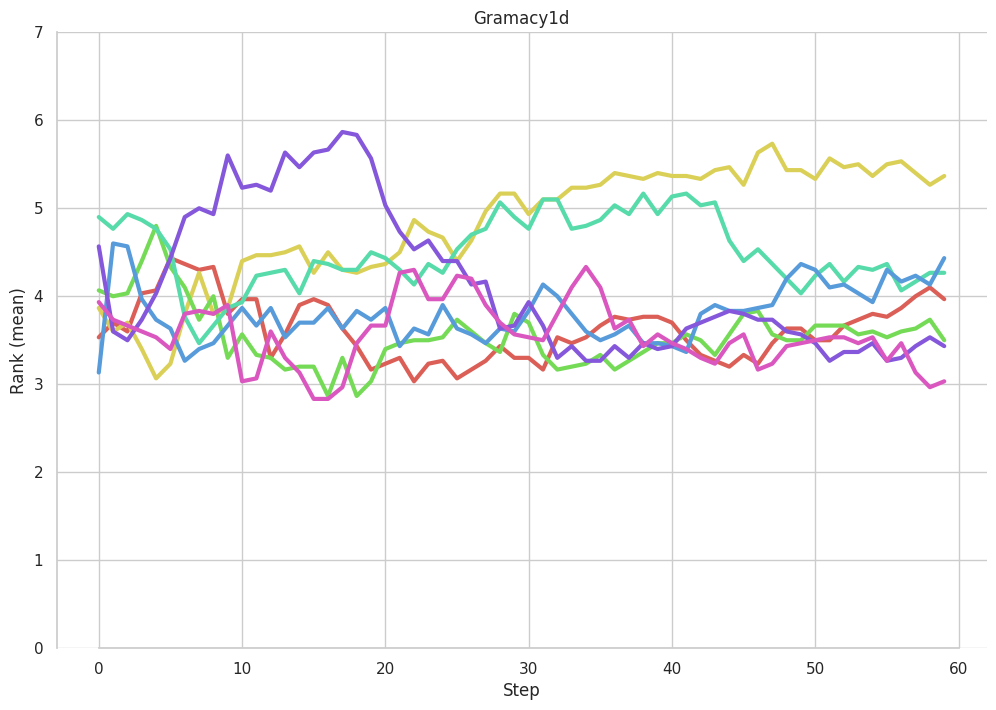

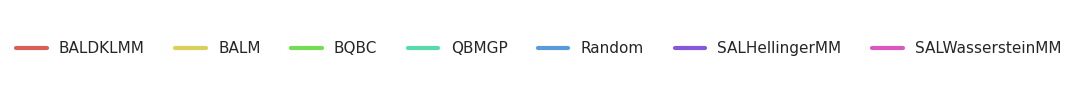

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
df = big_result

# Set the style of seaborn
sns.set(style="whitegrid")

# Define a bright color palette
palette = sns.color_palette("hls", n_colors=len(df['acquisition'].unique()))
palette_dict = dict(zip(df['acquisition'].unique(), palette))

# Main plot
plt.figure(figsize=(12, 8))
for i, acquisition in enumerate(df['acquisition'].unique()):
    subset = df[df['acquisition'] == acquisition]
    x = subset['_step'].to_numpy()
    y = subset['mean_rank'].to_numpy()
    #std_dev = subset['std_rank'].to_numpy()
    #ci = 1.645 * std_dev  # 90% confidence interval
    plt.plot(x, y, label=acquisition, color=palette[i], lw=3)
    #plt.fill_between(x, y - ci, y + ci, color=palette[i], alpha=0.2)

# Set title and labels
plot_title = 'Gramacy1d'
plt.title(plot_title)
plt.xlabel('Step')
plt.ylabel('Rank (mean)')
plt.ylim(0, 7)
sns.despine(trim=True)

# Extract handles and labels for the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Show the main plot
plt.show()

# Legend plot
# Create a new figure specifically for the legend
fig_legend, ax_legend = plt.subplots(figsize=(10, 1))
# Add the legend from the handles and labels
ax_legend.legend(handles, labels, loc='center', ncol=len(labels), frameon=False)
ax_legend.axis('off')

# Show the legend plot
plt.show()